# California Public Schools: Meeting ELA Standards
#### Project Description

In [1]:
# Import Libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
# mdoels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

import warnings; warnings.simplefilter('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('../data/California_School_District_Areas_2018-19.csv')
pd.set_option('display.max_columns', None)
df.drop(columns=['OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'UpdateNotes'], inplace=True)
df.shape

(944, 63)

In [3]:
df.head()

,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area
0,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07
1,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06
2,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07
3,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08
4,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06


## Clean Dataset

In [4]:
# renaming the columns
df = df.rename(columns=
           {'DistrictName': 'SchoolName',
            'DistrictType': 'SchoolType',
            'AAcount': 'AfricanAmerican',
            'AApct': 'AfricanAmericanPct',
            'AIcount': 'AmericanIndian',
            'AIpct': 'AmericanIndianPct',
            'AScount': 'Asian',
            'ASpct': 'AsianPct',
            'FIcount': 'Filipino',
            'FIpct': 'FilipinoPct',
            'HIcount': 'Hispanic',
            'HIpct': 'HispanicPct',
            'MRcount': 'MultipleRace',
            'MRpct': 'MulitpleRacePct',
            'PIcount': 'PacificIslander',
            'PIpct': 'PacificIslanderPct',
            'WHcount': 'White',
            'WHpct': 'WhitePct',
            'NRcount': 'RaceNotReported',
            'NRpct': 'RaceNotReportedPct',
            'ELcount': 'EnglishLearner',
            'ELpct': 'EnglishLearnerPct',
            'FOScount': 'Foster',
            'FOSpct': 'FosterPct',
            'HOMcount': 'Homeless',
            'HOMpct': 'HomelessPct',
            'MIGcount': 'Migrant',
            'MIGpct': 'MigrantPct',
            'SWDcount': 'Disability',
            'SWDpct': 'DisabilityPct',
            'SEDcount': 'SocioEconDisadvantage',
            'SEDpct': 'SocioEconDisadvantagePct',
            'UPcount': 'Unduplicated',
            'UPpct': 'UnduplicatedPct'
            },
              inplace=False)

In [5]:
# df['MathStdMetPct'].describe()
# df['ELAStdMetPct'].describe()
# df['StudentPerformancePercent'] = ((df['MathTested'] + df['ELATested']) / 2) / df['EnrollTotal']

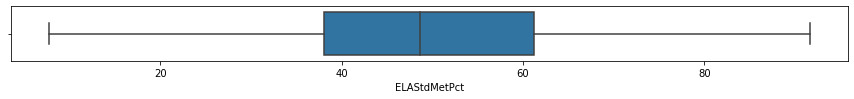

In [6]:
# target variable
plt.figure(figsize=(15,1))
sns.boxplot(data=df, x='ELAStdMetPct');

In [7]:
df['target'] = np.where(df.ELAStdMetPct >= 61.225, 1, 0)

In [8]:
df['target'].value_counts()

0    714
1    230
Name: target, dtype: int64

In [9]:
df.drop(columns=['AfricanAmerican', 'AmericanIndian', 'Asian', 'Filipino', 'Hispanic', 'MultipleRace', 'PacificIslander', 'White', 'RaceNotReported', 'EnglishLearner', 'Foster', 'Homeless', 'Migrant', 'Disability', 'SocioEconDisadvantage', 'ELATested', 'ELAStdMetPct', 'MathTested', 'MathStdMetPct', 'CCPrepCohortCount', 'AbsentEligCount', 'GradCohortCount'], inplace=True)

#### Null Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 42 columns):
CountyName                  944 non-null object
SchoolName                  944 non-null object
SchoolType                  944 non-null object
GradeLow                    944 non-null object
GradeHigh                   944 non-null int64
GradeLowCensus              944 non-null object
GradeHighCensus             944 non-null int64
AssistStatus                944 non-null object
CongressUS                  944 non-null object
SenateCA                    944 non-null object
AssemblyCA                  944 non-null object
LocaleDistrict              944 non-null object
EnrollTotal                 944 non-null int64
EnrollCharter               944 non-null int64
EnrollNonCharter            944 non-null int64
AfricanAmericanPct          944 non-null float64
AmericanIndianPct           944 non-null float64
AsianPct                    944 non-null float64
FilipinoPct                 944 n

In [11]:
## How do we want to handle null values

# same with the null --- for grad and drop out

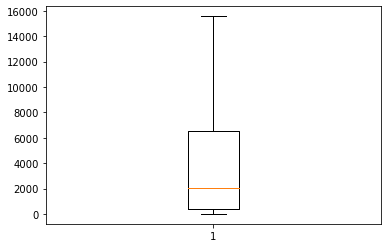

In [12]:
fig, ax = plt.subplots()
ax = plt.boxplot(df.EnrollTotal, showfliers = False)

In [13]:
df.describe()

,GradeHigh,GradeHighCensus,EnrollTotal,EnrollCharter,EnrollNonCharter,AfricanAmericanPct,AmericanIndianPct,AsianPct,FilipinoPct,HispanicPct,MulitpleRacePct,PacificIslanderPct,WhitePct,RaceNotReportedPct,EnglishLearnerPct,FosterPct,HomelessPct,MigrantPct,DisabilityPct,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,CCPrepPct,AbsentPct,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,target
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,403.000000,936.000000,464.000000,464.000000,464.000000,939.000000,939.000000,944.000000,9.440000e+02,944.000000
mean,9.958686,9.653602,6425.233051,594.626059,5830.606992,2.568326,1.918644,5.368856,1.353284,45.025636,4.574788,0.364195,37.744809,1.080720,17.504025,0.519703,3.154449,1.519174,10.698411,57.559110,3667.047669,60.406991,45.161787,11.681517,85.747845,41.782974,8.969828,6864.900958,3.401810,137478.658644,8.992017e+08,0.243644
std,2.135244,2.172743,22040.869205,5209.655649,17345.904065,4.333551,6.817423,9.993284,2.592887,28.123249,5.172701,0.974320,25.597142,2.817625,16.198711,0.778866,5.547407,3.756048,3.865557,25.054015,13712.296227,24.968052,15.960657,7.979224,15.547711,21.748206,12.620977,23068.520876,3.091488,120833.689911,1.835299e+09,0.429508
min,5.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.100000,0.000000,0.000000,11.000000,0.000000,2134.672224,2.821288e+05,0.000000
25%,8.000000,8.000000,400.000000,0.000000,289.250000,0.400000,0.100000,0.500000,0.000000,19.450000,1.200000,0.000000,13.175000,0.000000,4.900000,0.100000,0.200000,0.000000,8.600000,38.975001,157.000000,42.249999,35.649999,6.675000,85.000000,28.900000,2.900000,427.000000,1.350000,54183.396949,8.853034e+07,0.000000
50%,12.000000,8.000000,2040.500000,0.000000,1646.000000,1.100000,0.400000,1.600000,0.500000,40.799999,3.550000,0.200000,36.850001,0.300000,13.050000,0.300000,1.000000,0.000000,10.800000,59.500000,784.500000,62.850001,43.400002,10.100000,90.049999,41.700001,5.500000,2187.000000,2.700000,101249.413155,2.769788e+08,0.000000
75%,12.000000,12.000000,6550.000000,226.500000,6018.500000,2.700000,1.100000,5.100000,1.400000,67.549999,6.600000,0.400000,60.124999,1.100000,24.925000,0.700000,3.725000,1.100000,12.500000,77.925002,3189.250000,81.124998,56.450001,14.500000,93.800003,53.700001,9.700000,6981.500000,4.800000,180708.436455,8.492910e+08,0.000000
max,12.000000,12.000000,607723.000000,154447.000000,453276.000000,43.900002,86.699997,73.099998,30.200001,100.000000,100.000000,23.500000,100.000000,46.000000,78.599998,8.300000,58.200001,40.400002,35.700001,100.000000,376812.000000,100.000000,87.400002,65.400002,100.000000,100.000000,93.800003,630838.000000,25.900000,913155.411235,2.111754e+10,1.000000


In [14]:
df['smallenrollment'] = np.where(df['EnrollTotal'] <= df['EnrollTotal'].quantile(0.25), 1, 0)
df['mediumenrollment'] = np.where(((df['EnrollTotal'] > df['EnrollTotal'].quantile(0.25)) & (df['EnrollTotal'] <= df['EnrollTotal'].quantile(0.5))), 1, 0)
df['largeenrollment'] = np.where(((df['EnrollTotal'] > df['EnrollTotal'].quantile(0.5)) & (df['EnrollTotal'] <= df['EnrollTotal'].quantile(0.75))), 1, 0)
df['xlenrollment'] = np.where((df['EnrollTotal'] > df['EnrollTotal'].quantile(0.75)), 1, 0)



In [15]:
df['charterpct'] = df['EnrollCharter'] / df['EnrollTotal'] * 100
df['noncharterpct'] = df['EnrollNonCharter'] / df['EnrollTotal'] * 100

In [16]:
df.drop(columns = ['EnrollTotal', 'EnrollCharter', 'EnrollNonCharter'], inplace = True)

In [17]:
df['unified'] = np.where(df['SchoolType'] == 'Unified', 1, 0)
df['elem'] = np.where(df['SchoolType'] == 'Elementary', 1, 0)
df['high'] = np.where(df['SchoolType'] == 'High', 1, 0)

In [18]:
df.drop(columns = ['SchoolType'], inplace= True)

In [19]:
df.LocaleDistrict.value_counts()

21 - Suburban, Large      235
41 - Rural, Fringe        142
42 - Rural, Distant       125
32 - Town, Distant         68
43 - Rural, Remote         63
31 - Town, Fringe          56
12 - City, Midsize         53
11 - City, Large           51
13 - City, Small           45
22 - Suburban, Midsize     42
33 - Town, Remote          33
23 - Suburban, Small       31
Name: LocaleDistrict, dtype: int64

In [20]:
df['LocaleDistrict'] = [ x[:2] for x in df['LocaleDistrict']]


In [21]:
df['suburban'] = np.where(((df['LocaleDistrict'] == '21') | (df['LocaleDistrict'] == '23')), 1, 0)
df['rural'] = np.where(((df['LocaleDistrict'] == '41') | (df['LocaleDistrict'] == '42') | (df['LocaleDistrict'] == '43')), 1, 0)
df['town'] = np.where(((df['LocaleDistrict'] == '32') | (df['LocaleDistrict'] == '33')), 1, 0)
df['city'] = np.where(((df['LocaleDistrict'] == '12') | (df['LocaleDistrict'] == '11') | (df['LocaleDistrict'] == '13')), 1, 0)
df['assistance'] = np.where(df['AssistStatus'] == 'Differentiated Assistance', 1, 0)

In [22]:
df.drop(columns = ['AssistStatus'], inplace= True)

In [23]:
df.drop(columns = ['GradeLowCensus', 'GradeHighCensus'], inplace = True)

In [24]:
df.head()

,CountyName,SchoolName,GradeLow,GradeHigh,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,AfricanAmericanPct,AmericanIndianPct,AsianPct,FilipinoPct,HispanicPct,MulitpleRacePct,PacificIslanderPct,WhitePct,RaceNotReportedPct,EnglishLearnerPct,FosterPct,HomelessPct,MigrantPct,DisabilityPct,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,CCPrepPct,AbsentPct,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,target,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,suburban,rural,town,city,assistance
0,Alameda,Alameda Unified,KG,12,13,09,18,21,7.300000,0.2,25.299999,6.1,17.400000,11.6,0.6,28.799999,2.6,14.2,0.2,0.6,0.0,11.4,31.299999,3144,33.500000,56.799999,9.4,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,1,0,0,0,1,16.669627,83.330373,1,0,0,1,0,0,0,1
1,Alameda,Albany City Unified,KG,12,13,09,15,21,3.000000,0.1,28.900000,1.3,16.100000,13.9,0.2,31.600000,5.1,15.8,0.1,0.3,0.0,8.5,21.100000,1118,30.400000,62.599998,6.4,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,1,0,0,1,0,0.000000,100.000000,1,0,0,1,0,0,0,0
2,Alameda,Berkeley Unified,KG,12,13,09,15,12,14.100000,0.2,7.200000,0.8,23.900000,14.4,0.1,39.200001,0.1,9.3,0.2,2.6,0.0,11.3,32.700001,3275,33.400002,63.299999,9.7,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07,1,0,0,0,1,3.757112,96.242888,1,0,0,0,0,0,1,1
3,Alameda,Castro Valley Unified,KG,12,"13,15","07,09,10","18,20",21,5.300000,0.2,27.400000,4.5,23.799999,9.8,0.5,26.799999,1.7,11.0,0.1,0.7,0.0,8.6,24.600000,2739,29.600000,57.099998,7.4,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08,1,0,0,0,1,0.000000,100.000000,1,0,0,1,0,0,0,0
4,Alameda,Emery Unified,KG,12,13,09,15,21,43.900002,0.1,11.200000,1.5,24.900000,8.3,1.1,9.000000,0.0,21.5,0.1,0.9,0.0,7.4,80.800003,613,83.099998,22.500000,20.5,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06,0,0,1,0,0,0.000000,100.000000,1,0,0,1,0,0,0,1


#### Outliers

In [25]:
# columns = list(df.columns)
# columns.remove('CountyName')
# columns.remove('SchoolName')
# columns.remove('GradeLow')
# columns.remove('CongressUS')
# columns.remove('SenateCA')
# columns.remove('AssemblyCA')
# columns.remove('LocaleDistrict')

# for item in columns:
#     plt.figure(figsize=(15,1))
#     sns.boxplot(data=df, x=item);

In [26]:
df.loc[df['AfricanAmericanPct'] >= 30, 'AfricanAmericanPct'] = 30
df.loc[df['AmericanIndianPct'] >= 40, 'AmericanIndianPct'] = 40
df.loc[df['MulitpleRacePct'] >= 30, 'MulitpleRacePct'] = 30
df.loc[df['PacificIslanderPct'] >= 10, 'PacificIslanderPct'] = 10
df.loc[df['HomelessPct'] >= 40, 'HomelessPct'] = 40
df.loc[df['MigrantPct'] >= 22, 'MigrantPct'] = 22
df.loc[df['Unduplicated'] >= 50000, 'Unduplicated'] = 50000
df.loc[df['EnrollCumulative'] >= 100000, 'EnrollCumulative'] = 100000

In [27]:
df.isnull().sum()

CountyName                    0
SchoolName                    0
GradeLow                      0
GradeHigh                     0
CongressUS                    0
SenateCA                      0
AssemblyCA                    0
LocaleDistrict                0
AfricanAmericanPct            0
AmericanIndianPct             0
AsianPct                      0
FilipinoPct                   0
HispanicPct                   0
MulitpleRacePct               0
PacificIslanderPct            0
WhitePct                      0
RaceNotReportedPct            0
EnglishLearnerPct             0
FosterPct                     0
HomelessPct                   0
MigrantPct                    0
DisabilityPct                 0
SocioEconDisadvantagePct      0
Unduplicated                  0
UnduplicatedPct               0
CCPrepPct                   541
AbsentPct                     8
GradPct                     480
UCCSUReqMetPct              480
DropOutPct                  480
EnrollCumulative              5
SuspPct 

In [28]:
df.drop(columns = ['CCPrepPct', 'GradPct', 'UCCSUReqMetPct', 'DropOutPct', 'UnduplicatedPct', 'Unduplicated'], inplace = True)

In [29]:
df['AbsentPct'] = df['AbsentPct'].replace(np.NaN, 0)
df['EnrollCumulative'] = df['EnrollCumulative'].replace(np.NaN, 0) 
df['SuspPct'] = df['SuspPct'].replace(np.NaN, 0) 

## Modeling

In [30]:
df2 = df.select_dtypes(exclude=['object']) # excluding objects

In [31]:
# features
X = df2.drop('target', axis = 1) 
# target variable
y = df2['target']

In [32]:
df_features = df.drop('target', axis = 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=20)

In [34]:
##### add in class imbalance

### Logistic Regression

In [35]:
features = ['AfricanAmericanPct', 'AmericanIndianPct', 'AsianPct', 'HispanicPct', 'WhitePct', 'EnglishLearnerPct', 'SocioEconDisadvantagePct', 'smallenrollment', 'mediumenrollment', 'largeenrollment', 'xlenrollment', 'charterpct', 'noncharterpct', 'suburban', 'rural', 'town', 'city', 'assistance']
scaler = StandardScaler()  
scaler.fit(X_train[features])
X_train_scaled = scaler.transform(X_train[features])  
X_test_scaled = scaler.transform(X_test[features])

In [36]:
lr_initial = LogisticRegression(C = 1, random_state = 20, class_weight = 'balanced')
lr_initial.fit(X_train_scaled, y_train)

lr_pred_train = lr_initial.predict(X_train_scaled)
lr_initial_pred = lr_initial.predict(X_test_scaled)

In [37]:
coef = dict(zip(list(features), list(lr_initial.coef_[0])))
coef

{'AfricanAmericanPct': -0.19226411534001053,
 'AmericanIndianPct': -0.735286411116644,
 'AsianPct': 1.0152813612485214,
 'HispanicPct': 0.6563240900373005,
 'WhitePct': 0.12979220303330796,
 'EnglishLearnerPct': -0.44941918181836543,
 'SocioEconDisadvantagePct': -2.663310423228259,
 'smallenrollment': 0.08476491517677053,
 'mediumenrollment': -0.09190493757913397,
 'largeenrollment': 0.006417499087187728,
 'xlenrollment': 0.0016952497563421374,
 'charterpct': 0.031021933974821593,
 'noncharterpct': -0.03102193397482242,
 'suburban': -0.27682292895959715,
 'rural': -0.4337912113164061,
 'town': 0.058711664055892517,
 'city': -0.2550526094523017,
 'assistance': -0.3805917357836882}

In [38]:
THRESHOLD = .3
y_pred_lr_initial_test = np.where(lr_initial.predict_proba(X_test_scaled)[:,1] > THRESHOLD, 1, 0)
y_pred_lr_initial_train = np.where(lr_initial.predict_proba(X_train_scaled)[:,1] > THRESHOLD, 1, 0)

In [69]:
# print(metrics.recall_score(y_test, y_pred_lr_initial_test))
# print(metrics.recall_score(y_train, y_pred_lr_initial_train))

In [40]:
metric_dict = {}
metric_dict['LogisticRegression'] = {'train_accuracy': metrics.accuracy_score(y_train, lr_pred_train),
                                      'test_accuracy': metrics.accuracy_score(y_test, lr_initial_pred),
                                      'train_precision':metrics.precision_score(y_train, lr_pred_train),
                                      'test_precision':metrics.precision_score(y_test, lr_initial_pred),
                                      'train_recall':metrics.recall_score(y_train, lr_pred_train),
                                      'test_recall':metrics.recall_score(y_test, lr_initial_pred),
                                      'train_f1':metrics.f1_score(y_train, lr_pred_train),
                                      'test_f1':metrics.f1_score(y_test, lr_initial_pred)}

In [41]:
metric_dict['LogisticRegressionThreshold'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_lr_initial_train),
                                              'test_accuracy': metrics.accuracy_score(y_test, y_pred_lr_initial_test),
                                              'train_precision':metrics.precision_score(y_train, y_pred_lr_initial_train),
                                              'test_precision':metrics.precision_score(y_test, y_pred_lr_initial_test),
                                              'train_recall':metrics.recall_score(y_train, y_pred_lr_initial_train),
                                              'test_recall':metrics.recall_score(y_test, y_pred_lr_initial_test),
                                              'train_f1':metrics.f1_score(y_train, y_pred_lr_initial_train),
                                              'test_f1':metrics.f1_score(y_test, y_pred_lr_initial_test)}


In [42]:
# #determine f1 score
# lr_train_f1 = metrics.f1_score(lr_pred_train, y_train)
# print('LogReg Train F1 score: ', lr_train_f1)

# lr_initial_f1 = metrics.f1_score(lr_initial_pred, y_test)
# print('LogReg Test F1 score: ', lr_initial_f1)

# lr_train_acc = metrics.accuracy_score(lr_pred_train, y_train)
# print('LogReg Train Accuracy score: ', lr_train_acc)

# lr_initial_acc = metrics.accuracy_score(lr_initial_pred, y_test)
# print('LogReg Test Accuracy score: ', lr_initial_acc)

### KNN

In [43]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [44]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

In [45]:
# print(metrics.accuracy_score(y_test, y_pred_knn_test))
# print(metrics.accuracy_score(y_train, y_pred_knn_train))
# print(metrics.recall_score(y_test, y_pred_knn))
# print(metrics.precision_score(y_test, y_pred_knn))
# print(metrics.f1_score(y_test, y_pred_knn))

In [46]:
metric_dict['KNN'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_knn_train),
                      'test_accuracy': metrics.accuracy_score(y_test, y_pred_knn_test),
                      'train_precision':metrics.precision_score(y_train, y_pred_knn_train),
                      'test_precision':metrics.precision_score(y_test, y_pred_knn_test),
                      'train_recall':metrics.recall_score(y_train, y_pred_knn_train),
                      'test_recall':metrics.recall_score(y_test, y_pred_knn_test),
                      'train_f1':metrics.f1_score(y_train, y_pred_knn_train),
                      'test_f1':metrics.f1_score(y_test, y_pred_knn_test)}

### Decision Tree

In [47]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [48]:
decision_tree.fit(X_train,y_train)
columns = list(X.columns)
importance = list(decision_tree.feature_importances_)
feature_importance = dict(zip(columns, importance))
sorted_dict = sorted(feature_importance.items(), key=lambda kv: kv[1])
sorted_dict.reverse()
sorted_dict

[('SocioEconDisadvantagePct', 0.5978217428529438),
 ('HomelessPct', 0.045261773809136915),
 ('EnrollCumulative', 0.04234859699520505),
 ('HispanicPct', 0.03693573162913492),
 ('AbsentPct', 0.03346370680244243),
 ('AsianPct', 0.02730442942586175),
 ('SHAPE_Length', 0.025383764551829634),
 ('MulitpleRacePct', 0.021762479871175522),
 ('SuspPct', 0.02082847221706136),
 ('DisabilityPct', 0.01938850750063565),
 ('EnglishLearnerPct', 0.018656712048016395),
 ('AmericanIndianPct', 0.01746961506019477),
 ('MigrantPct', 0.017085551407320328),
 ('AfricanAmericanPct', 0.016666183668665235),
 ('high', 0.01178376008917633),
 ('PacificIslanderPct', 0.011245974235104667),
 ('FosterPct', 0.011133080285254202),
 ('charterpct', 0.007274970622796672),
 ('WhitePct', 0.005471014492753623),
 ('FilipinoPct', 0.00541924644495257),
 ('smallenrollment', 0.003647342995169082),
 ('SHAPE_Area', 0.003647342995169082),
 ('assistance', 0.0),
 ('city', 0.0),
 ('town', 0.0),
 ('rural', 0.0),
 ('suburban', 0.0),
 ('elem',

In [49]:
param_dict={'max_depth': range(1,10),
            'criterion': ['gini', 'entropy'],
            'splitter': ['random', 'best'],
            'max_features': ['auto', 'sqrt', 'log2']}

In [50]:
grid_tree=GridSearchCV(decision_tree, 
                       param_dict, 
                       cv=10, 
                       scoring='f1', 
                       verbose=1, 
                       n_jobs=-1)

In [51]:
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    2.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             scoring='f1', verbose=1)

In [52]:
y_pred_dtc_test = grid_tree.best_estimator_.predict(X_test)
y_pred_dtc_train = grid_tree.best_estimator_.predict(X_train)

In [53]:
# print(metrics.accuracy_score(y_test, y_pred_dtc))
# print(metrics.recall_score(y_test, y_pred_dtc))
# print(metrics.precision_score(y_test, y_pred_dtc))
# print(metrics.f1_score(y_test, y_pred_dtc))

In [54]:
metric_dict['DecisionTree'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_dtc_train),
                                  'test_accuracy': metrics.accuracy_score(y_test, y_pred_dtc_test),
                                  'train_precision':metrics.precision_score(y_train, y_pred_dtc_train),
                                  'test_precision':metrics.precision_score(y_test, y_pred_dtc_test),
                                  'train_recall':metrics.recall_score(y_train, y_pred_dtc_train),
                                  'test_recall':metrics.recall_score(y_test, y_pred_dtc_test),
                                  'train_f1':metrics.f1_score(y_train, y_pred_dtc_train),
                                  'test_f1':metrics.f1_score(y_test, y_pred_dtc_test)}

### Bagged Decision Tree

In [55]:
bc_dtc = BaggingClassifier(
            base_estimator=DecisionTreeClassifier(random_state = 1, max_depth=5, class_weight='balanced'), 
            n_estimators= 2000,
            max_samples= 0.8,
            max_features= 20,
            oob_score= True
                )


In [56]:
bc_dtc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=5,
                                                        random_state=1),
                  max_features=20, max_samples=0.8, n_estimators=2000,
                  oob_score=True)

In [57]:
THRESHOLD = .4
y_pred_bc_dtc_test = np.where(bc_dtc.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
y_pred_bc_dtc_train = np.where(bc_dtc.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [58]:
# print(metrics.accuracy_score(y_test, y_pred_bc_dtc))
# print(metrics.recall_score(y_test, y_pred_bc_dtc))
# print(metrics.precision_score(y_test, y_pred_bc_dtc))
# print(metrics.f1_score(y_test, y_pred_bc_dtc))

In [59]:
metric_dict['BaggedDecisionTree'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_bc_dtc_train),
                                  'test_accuracy': metrics.accuracy_score(y_test, y_pred_bc_dtc_test),
                                  'train_precision':metrics.precision_score(y_train, y_pred_bc_dtc_train),
                                  'test_precision':metrics.precision_score(y_test, y_pred_bc_dtc_test),
                                  'train_recall':metrics.recall_score(y_train, y_pred_bc_dtc_train),
                                  'test_recall':metrics.recall_score(y_test, y_pred_bc_dtc_test),
                                  'train_f1':metrics.f1_score(y_train, y_pred_bc_dtc_train),
                                  'test_f1':metrics.f1_score(y_test, y_pred_bc_dtc_test)}

### Random Forest

In [60]:
rfc = RandomForestClassifier(random_state = 1, 
                             n_estimators=50, 
                             max_depth=10, 
                             max_features=20)

In [61]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=20, n_estimators=50,
                       random_state=1)

In [62]:
y_pred_rfc_test = rfc.predict(X_test)
y_pred_rfc_train = rfc.predict(X_train)

In [63]:
# print(metrics.accuracy_score(y_test, y_pred_rfc_train ))
# print(metrics.recall_score(y_test, y_pred_rfc_train))
# print(metrics.precision_score(y_test, y_pred_rfc_train))
# print(metrics.f1_score(y_test, y_pred_rfc_train))

In [64]:
metric_dict['RandomForest'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_rfc_train),
                                  'test_accuracy': metrics.accuracy_score(y_test, y_pred_rfc_test),
                                  'train_precision':metrics.precision_score(y_train, y_pred_rfc_train),
                                  'test_precision':metrics.precision_score(y_test, y_pred_rfc_test),
                                  'train_recall':metrics.recall_score(y_train, y_pred_rfc_train),
                                  'test_recall':metrics.recall_score(y_test, y_pred_rfc_test),
                                  'train_f1':metrics.f1_score(y_train, y_pred_rfc_train),
                                  'test_f1':metrics.f1_score(y_test, y_pred_rfc_test)}

### Voting Classifier

In [65]:
voting_clf = VotingClassifier(
                estimators=[('knn', knn), ('dtc', grid_tree), ('bagged_dtc', bc_dtc)], 
                voting='hard')

voting_clf.fit(X_train, y_train)

y_pred_vc_test = voting_clf.predict(X_test)
y_pred_vc_train = voting_clf.predict(X_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    0.9s finished


In [66]:
# print(metrics.accuracy_score(y_test, y_pred_vc))
# print(metrics.recall_score(y_test, y_pred_vc))
# print(metrics.precision_score(y_test, y_pred_vc))
# print(metrics.f1_score(y_test, y_pred_vc))

In [67]:
metric_dict['VotingClassifier'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_vc_train),
                                  'test_accuracy': metrics.accuracy_score(y_test, y_pred_vc_test),
                                  'train_precision':metrics.precision_score(y_train, y_pred_vc_train),
                                  'test_precision':metrics.precision_score(y_test, y_pred_vc_test),
                                  'train_recall':metrics.recall_score(y_train, y_pred_vc_train),
                                  'test_recall':metrics.recall_score(y_test, y_pred_vc_test),
                                  'train_f1':metrics.f1_score(y_train, y_pred_vc_train),
                                  'test_f1':metrics.f1_score(y_test, y_pred_vc_test)}

### Metric Evaluation

In [68]:
pd.DataFrame.from_dict(metric_dict, orient='index')

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
LogisticRegression,0.883444,0.873016,0.698276,0.732143,0.900000,0.82,0.786408,0.773585
LogisticRegressionThreshold,0.830464,0.830688,0.589655,0.621622,0.950000,0.92,0.727660,0.741935
KNN,0.882119,0.820106,0.869919,0.833333,0.594444,0.40,0.706271,0.540541
DecisionTree,0.970861,0.772487,0.970238,0.577778,0.905556,0.52,0.936782,0.547368
BaggedDecisionTree,0.950993,0.867725,0.829493,0.745098,1.000000,0.76,0.906801,0.752475
RandomForest,0.998675,0.873016,1.000000,0.882353,0.994444,0.60,0.997214,0.714286
VotingClassifier,0.960265,0.846561,0.951807,0.800000,0.877778,0.56,0.913295,0.658824
